<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualizing-weights,-activations-and-receptive-fields" data-toc-modified-id="Visualizing-weights,-activations-and-receptive-fields-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Visualizing weights, activations and receptive fields</a></span></li><li><span><a href="#Are-all-libraries-that-are-needed-available?" data-toc-modified-id="Are-all-libraries-that-are-needed-available?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Are all libraries that are needed available?</a></span></li><li><span><a href="#Load-a-pre-trained-CNN" data-toc-modified-id="Load-a-pre-trained-CNN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load a pre-trained CNN</a></span></li><li><span><a href="#Generating-a-list-of-layer-names" data-toc-modified-id="Generating-a-list-of-layer-names-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Generating a list of layer names</a></span></li><li><span><a href="#Plotting-weights-histogram-for-a-single-CONV-layer" data-toc-modified-id="Plotting-weights-histogram-for-a-single-CONV-layer-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plotting weights histogram for a single CONV layer</a></span></li><li><span><a href="#Plotting-weights-histograms-for-all-CONV-layers" data-toc-modified-id="Plotting-weights-histograms-for-all-CONV-layers-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plotting weights histograms for all CONV layers</a></span></li><li><span><a href="#Plotting-weights-histogram-for-a-single-FC-layer" data-toc-modified-id="Plotting-weights-histogram-for-a-single-FC-layer-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plotting weights histogram for a single FC layer</a></span></li><li><span><a href="#Load-a-test-image" data-toc-modified-id="Load-a-test-image-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Load a test image</a></span></li><li><span><a href="#Do-a-feedforward-step-using-the-test-image" data-toc-modified-id="Do-a-feedforward-step-using-the-test-image-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Do a feedforward step using the test image</a></span></li><li><span><a href="#Visualizing-a-single-output-tensor" data-toc-modified-id="Visualizing-a-single-output-tensor-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Visualizing a single output tensor</a></span></li><li><span><a href="#Determining-the-receptive-field-size-of-a-neuron" data-toc-modified-id="Determining-the-receptive-field-size-of-a-neuron-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Determining the receptive field size of a neuron</a></span></li></ul></div>

# Visualizing weights, activations and receptive fields

In this notebook we want to try to understand the CNN better. For this, we load in a pre-trained VGG16 CNN. Then we

- generate histograms of the weights per layer
- visualize the neuron activations, i.e. show some feature maps of the output tensors after each conv layer
- generate histograms of feature map values
- visualize the (increasing) size of the recepetive fields of some selected neurons

# Are all libraries that are needed available?

In [1]:
import numpy as np
import tensorflow as tf
import keras
import cv2
import matplotlib
import matplotlib.pyplot as plt

print( "Your NumPy version is:      " + np.__version__ )
print( "Your TensorFlow version is: " + tf.__version__)
print( "Your Keras version is:      " + keras.__version__ )
print( "Your OpenCV version is:     " + cv2.__version__ )
print( "Your Matplotlib version is: " + matplotlib.__version__)

Using TensorFlow backend.


Your NumPy version is:      1.16.2
Your TensorFlow version is: 1.13.1
Your Keras version is:      2.1.6
Your OpenCV version is:     4.1.0
Your Matplotlib version is: 3.0.3


# Load a pre-trained CNN

In [2]:
from keras.applications import VGG16
import keras
from keras import backend as K

# clear the last Keras session
# this will clear the underlying TensorFlow graph
K.clear_session()

conv_base = VGG16(weights='imagenet', include_top=True, input_shape=(224,224,3))
conv_base.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

# Generating a list of layer names

In [3]:
print("\nNumber of layers:", len(conv_base.layers))

print("\nHere are the names of all layers:")
nr_conv_layers = 0
nr_pool_layers = 0
list_layer_names = []
for layer in conv_base.layers:
    print(layer.name)
    if "conv" in layer.name:
        nr_conv_layers+=1
    if "pool" in layer.name:
        nr_pool_layers+=1
    list_layer_names.append( layer.name )

print("\nSummary:")
print("\tNr of conv layers:", nr_conv_layers)
print("\tNr of pool layers:", nr_pool_layers)
print("\nLayer names:", list_layer_names)


Number of layers: 23

Here are the names of all layers:
input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten
fc1
fc2
predictions

Summary:
	Nr of conv layers: 13
	Nr of pool layers: 5

Layer names: ['input_1', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'flatten', 'fc1', 'fc2', 'predictions']


# Plotting weights histogram for a single CONV layer

Here we define a helper function that collects all the weights for a layer into one large list and then plots a histogram of that weights.

<class 'keras.layers.convolutional.Conv2D'>
filter_weights has shape (3, 3, 3, 64)


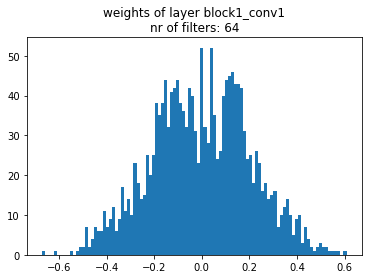

In [4]:
def plot_histogram_of_weights_for_CONV_layer(model, layer_name):
    
    # 1. check whether the specified layer is
    #    a conv layer
    if not "conv" in layer_name:        
        print("Sorry, this seems to be no CONV layer!")
        return

    # 2. get the layer
    lay = model.get_layer( layer_name )
    print(type(lay))

    # 3. get the list of weights from that layer
    #
    # note:
    # get_weights() returns a list with two elements:
    # list element #0: filter weights
    # list element #1: bias weights
    filter_weights = lay.get_weights()[0]
    print("filter_weights has shape", filter_weights.shape)

    # 4. how many filters are there in this conv layer?
    #
    # note:
    # the weights array is a 4D Numpy array with dimension:
    #   (filter_width, filter_height, nr_channels, nr_filters)
    nr_filters = filter_weights.shape[3]

    # 5. run through all filters of the conv layer ...
    #
    all_filter_weights = []
    for filter_nr in range(0, nr_filters):

            # 5.1 get that filter weights as 3D array
            single_filter_weights = filter_weights[:,:,:,filter_nr]

            #print("single_filter_weights has shape",
            #      single_filter_weights.shape)

            # 5.2 reshape the filter weights 3D array to
            #     a 1D array
            single_filter_weights_as_1D_array = \
                single_filter_weights.reshape(-1)

            # 5.3 add the current filter weights
            #     to list of ALL filter weights in that
            #     conv layer
            all_filter_weights += single_filter_weights_as_1D_array.tolist()

    #print(all_filter_weights)
    #plt.xlim(-2.0, +2.0)
    plt.hist(all_filter_weights, bins=100)
    plt.title("weights of layer {}\n"
              "nr of filters: {}"
              .format(layer_name, nr_filters))
    plt.show()
    
plot_histogram_of_weights_for_CONV_layer(conv_base, "block1_conv1")

# Plotting weights histograms for all CONV layers

<class 'keras.layers.convolutional.Conv2D'>
filter_weights has shape (3, 3, 3, 64)


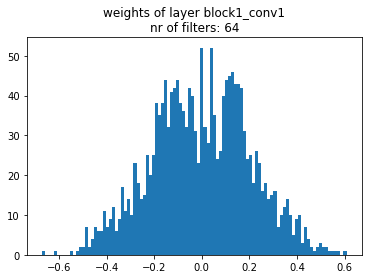

<class 'keras.layers.convolutional.Conv2D'>
filter_weights has shape (3, 3, 64, 64)


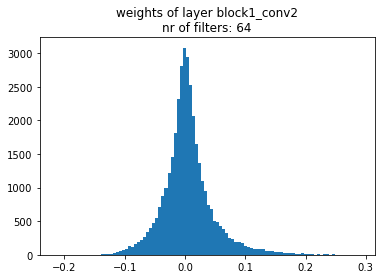

<class 'keras.layers.convolutional.Conv2D'>
filter_weights has shape (3, 3, 64, 128)


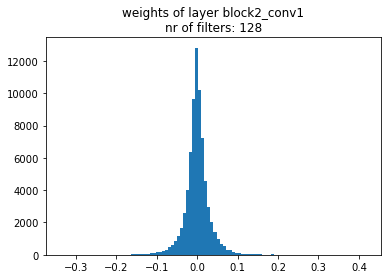

<class 'keras.layers.convolutional.Conv2D'>
filter_weights has shape (3, 3, 128, 128)


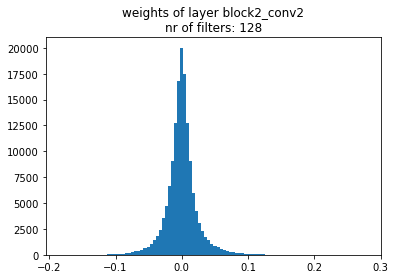

<class 'keras.layers.convolutional.Conv2D'>
filter_weights has shape (3, 3, 128, 256)


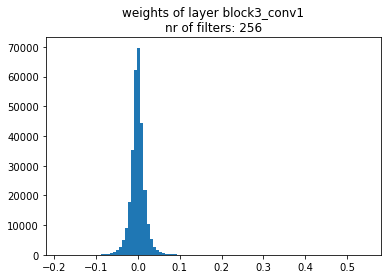

<class 'keras.layers.convolutional.Conv2D'>
filter_weights has shape (3, 3, 256, 256)


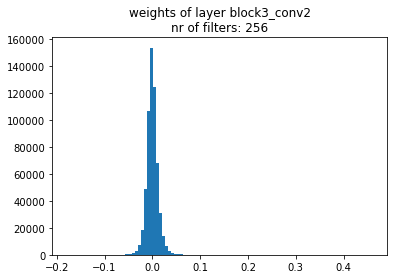

<class 'keras.layers.convolutional.Conv2D'>
filter_weights has shape (3, 3, 256, 256)


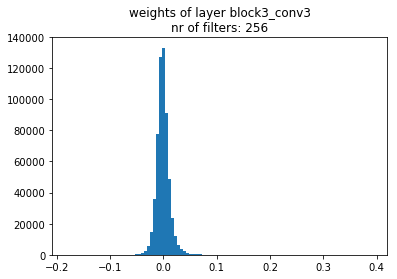

<class 'keras.layers.convolutional.Conv2D'>
filter_weights has shape (3, 3, 256, 512)


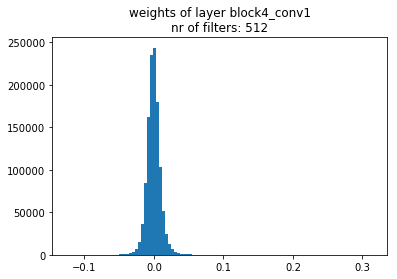

<class 'keras.layers.convolutional.Conv2D'>
filter_weights has shape (3, 3, 512, 512)


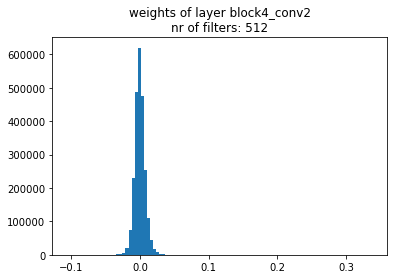

<class 'keras.layers.convolutional.Conv2D'>
filter_weights has shape (3, 3, 512, 512)


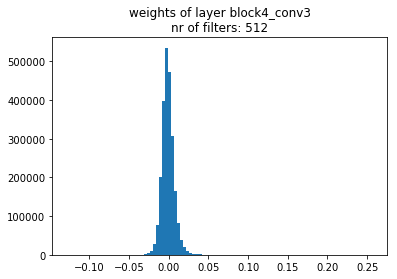

<class 'keras.layers.convolutional.Conv2D'>
filter_weights has shape (3, 3, 512, 512)


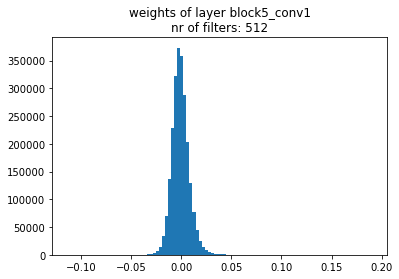

<class 'keras.layers.convolutional.Conv2D'>
filter_weights has shape (3, 3, 512, 512)


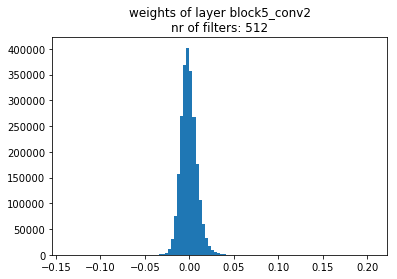

<class 'keras.layers.convolutional.Conv2D'>
filter_weights has shape (3, 3, 512, 512)


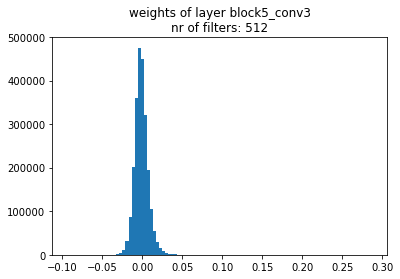

In [5]:
for layer in conv_base.layers:
    if "conv" in layer.name:
        plot_histogram_of_weights_for_CONV_layer(conv_base, layer.name)

# Plotting weights histogram for a single FC layer

<class 'keras.layers.core.Dense'>
filter_weights has shape (25088, 4096)
just_some_weights has shape (1000, 4096)
just_some_weights has shape (4096000,)
Histogram of FC layer weights will be generated
on basis of 4096000 weights.
[ 1.9745843e-05  3.5308721e-04 -1.8327669e-03 ...  7.2819128e-04
 -1.4344043e-03 -1.5179702e-03]


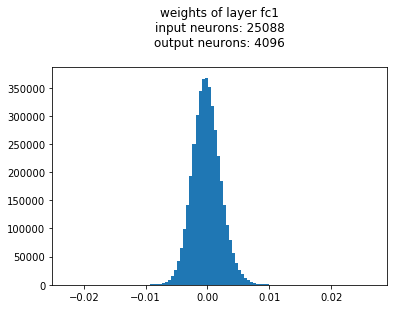

In [6]:
def plot_histogram_of_weights_for_FC_layer(model, layer_name):
    
    lay = model.get_layer( layer_name )
    print(type(lay))

    # note:
    # get_weights() returns a list with two elements:
    # list element #0: filter weights
    # list element #1: bias weights
    filter_weights = lay.get_weights()[0]
    print("filter_weights has shape", filter_weights.shape)

    # note:
    # the weights array is a 2D Numpy array with dimension:
    #   (input_neurons, output_neurons)
    nr_inp_neurons = filter_weights.shape[0]
    nr_out_neurons = filter_weights.shape[1]
    
    # since there are millions of weights,
    # we take just the weights of the first N=1000 features
    # to all the 4096 neurons
    just_some_weights = filter_weights[:1000]
    print("just_some_weights has shape", just_some_weights.shape)
    
    # reshape the weights 2D NumPy Array to a 1D NumPy Array
    just_some_weights = just_some_weights.reshape(-1)
    print("just_some_weights has shape", just_some_weights.shape)
    print("Histogram of FC layer weights will be generated")
    print("on basis of {} weights.".format(len(just_some_weights)))
        
    # show some weights
    print(just_some_weights)

    plt.hist(just_some_weights, bins=100)
    plt.title("weights of layer {}\n"
              "input neurons: {}\n"
              "output neurons: {}\n"
              .format(layer_name, nr_inp_neurons, nr_out_neurons))
    plt.show()
    
plot_histogram_of_weights_for_FC_layer(conv_base, "fc1")

# Load a test image

img has mean 185.81344334608843
x_preprocessed has mean 71.01411001275511


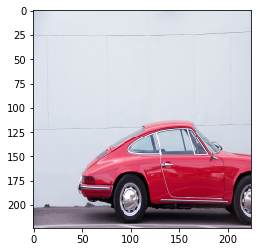

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


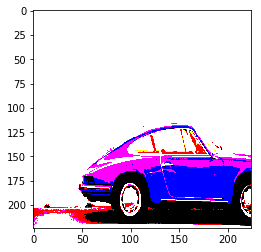

In [7]:
from keras.applications.vgg16 import preprocess_input

IMG_SIZE = (224,224)

def load_a_test_img():
    absolute_filename =\
        "V:\\01_job\\12_datasets\\03_test_images_unsplash\\misc\\car.jpg"

    img = cv2.imread(absolute_filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                
    img = cv2.resize(img, IMG_SIZE, interpolation=cv2.INTER_AREA)
    print("img has mean", np.mean(img))


    # From the VGG paper:
    # "The only pre-processing we do is subtracting the mean RGB value,
    # computed on the training set, from each pixel."
    #
    # see imagenet_utils.py
    #
    x = img.astype(float)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    x_preprocessed = x.reshape((224,224,3))
    print("x_preprocessed has mean", np.mean(x_preprocessed))

    return img, x_preprocessed

img, img_preprocessed = load_a_test_img()

plt.imshow(img)
plt.show()

plt.imshow(img_preprocessed)
plt.show()


# Do a feedforward step using the test image

Let's see, whether the VGG can correctly classify this image!

In [8]:
from keras.applications.vgg16 import decode_predictions

S = img_preprocessed.shape
input_img_tensor_4D = img_preprocessed.reshape((-1,S[0],S[1],S[2]))
neuron_outputs = conv_base.predict( input_img_tensor_4D )

pred_classes_and_probs =\
            decode_predictions(neuron_outputs, top=3)[0]
print(pred_classes_and_probs)

[('n02814533', 'beach_wagon', 0.5858351), ('n03770679', 'minivan', 0.1576984), ('n02974003', 'car_wheel', 0.061913025)]


Ok, it worked. VGG16 detected that the image shows some properties of cars.

# Visualizing a single output tensor

Since we have taken an example image and then did a feedforward step in the CNN, we already generated all the output tensors after each conv layer.

Each output tensor consists of several feature maps, which are plotted one by one by the following helper function.

**Important note:**<br>
Normally, Keras models only have one input and one output!

Since we are interested in all output tensors, we first have to generate a new model - which is called here ``activation_model`` - which will be initiated with a whole list of output tensors (using the ``outputs`` parameter of the ``Model()`` constructor).

In [9]:
from keras import models

# note: Normally, Keras models only have one
# input and one output.
# We first have to generate a model with several
# outputs
# See "Deep learning for computer vision" by
# Francois Chollet, p. 162
#
layer_outputs = []
layer_names = []
for lay in conv_base.layers:    
    if "conv" in lay.name:
        print(lay.name)
        layer_outputs.append( lay.output )
        layer_names.append( lay.name )
activation_model = models.Model(inputs=conv_base.input,
                               outputs=layer_outputs)
activation_model.summary()

block1_conv1
block1_conv2
block2_conv1
block2_conv2
block3_conv1
block3_conv2
block3_conv3
block4_conv1
block4_conv2
block4_conv3
block5_conv1
block5_conv2
block5_conv3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112

In [10]:
def plot_all_feature_maps(input_img_tensor):
    
    # 1. feedforward the image
    #    activations is a list of NumPy arrays
    output_tensors = activation_model.predict( input_img_tensor )
    print(type(output_tensors))
    print(type(output_tensors[0]))
    
    # 2. get nr of output tensors
    nr_output_tensors = len(output_tensors)
    print("Here are all {} output tensors"
          .format(nr_output_tensors) )

    # 3. for each output tensor ...
    for out_tensor_nr, out_tensor in enumerate(output_tensors):
        
        print("Output tensor for layer {}:"
              .format(layer_names[out_tensor_nr]) )
        
        print("\tIn this layer output tensor has shape {}"
              .format(out_tensor.shape))
        
        # 3.1 how many feature maps are stored in this
        #     output tensor?
        nr_feature_maps = out_tensor.shape[3]
        print("\tSo there are {} feature maps"
              .format(nr_feature_maps) )
        
        # 3.2 we will only show some of the feature maps
        NR_FEAT_MAPS_TO_SHOW = min(3,nr_feature_maps)
        print("\tFirst {} feature maps:".
              format(NR_FEAT_MAPS_TO_SHOW))
        
        # 3.3 for all feature maps to show ...
        for feat_map_nr in range(0, NR_FEAT_MAPS_TO_SHOW):
            
            # get the feature map as 2D NumPy array
            feat_map = out_tensor[0, :, :, feat_map_nr ]
            
            # set title of feature map visualization image
            plt.title("{} - map {}\nMin/Max value of feat_map: {:.2f}/{:.2f}"
                      .format(layer_names[out_tensor_nr],
                              feat_map_nr,
                              np.amin(feat_map),
                              np.amax(feat_map)) )            
            
            # show feature map = neuron activations as image
            plt.imshow(feat_map, cmap="coolwarm")
            #plt.imshow(feat_map, cmap="gray")
            cb = plt.colorbar(shrink=0.8)
            cb.ax.tick_params(labelsize=10)
            plt.show()
            
            # now also plot a histogram of the feature map values
            feat_map_as_1D_array = feat_map.reshape(-1)
            plt.hist(feat_map_as_1D_array, bins=100)
            plt.title("Histogram of feature values.\n"
                      "Mean activation value: {:.2f}"
                      .format(np.mean(feat_map_as_1D_array)))
            plt.show()
                        

<class 'list'>
<class 'numpy.ndarray'>
Here are all 13 output tensors
Output tensor for layer block1_conv1:
	In this layer output tensor has shape (1, 224, 224, 64)
	So there are 64 feature maps
	First 3 feature maps:


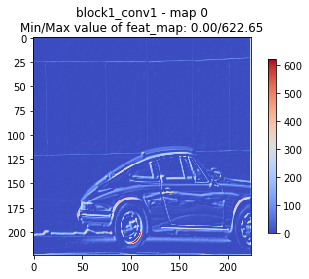

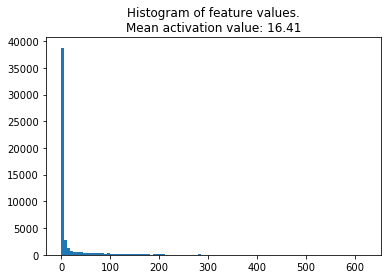

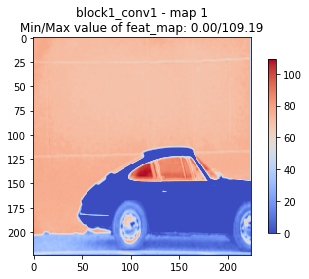

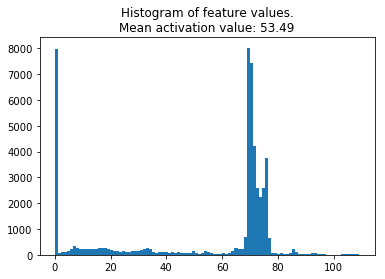

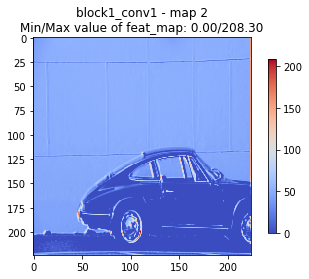

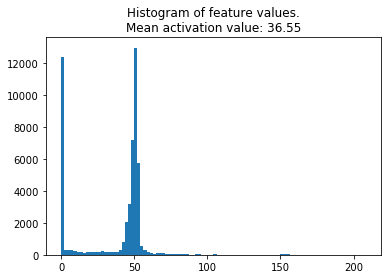

Output tensor for layer block1_conv2:
	In this layer output tensor has shape (1, 224, 224, 64)
	So there are 64 feature maps
	First 3 feature maps:


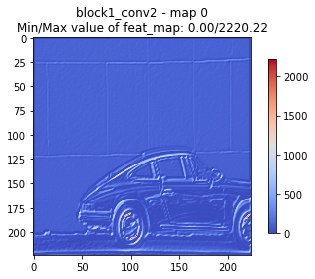

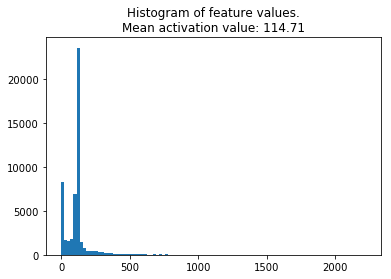

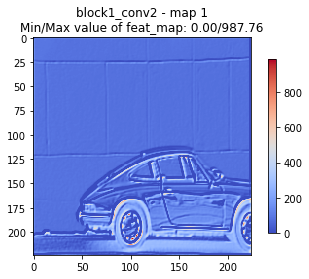

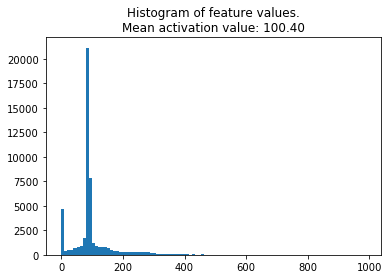

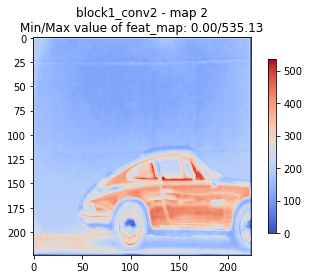

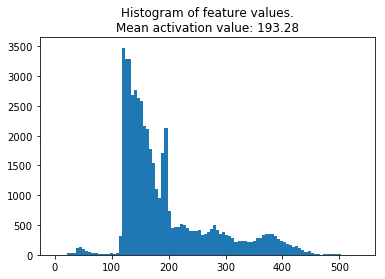

Output tensor for layer block2_conv1:
	In this layer output tensor has shape (1, 112, 112, 128)
	So there are 128 feature maps
	First 3 feature maps:


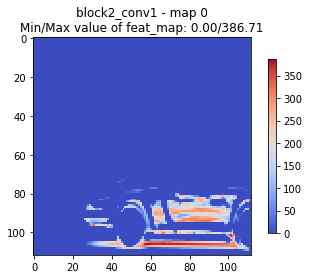

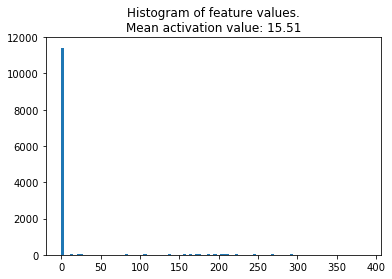

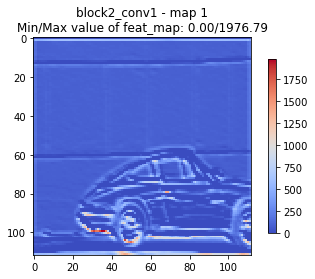

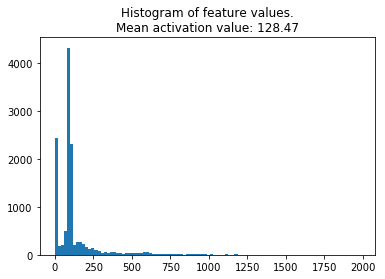

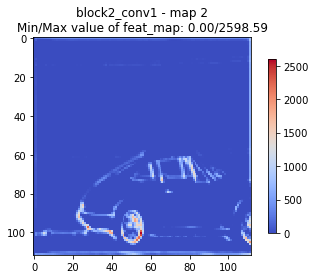

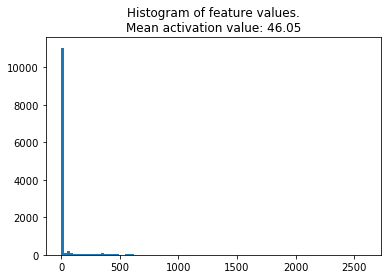

Output tensor for layer block2_conv2:
	In this layer output tensor has shape (1, 112, 112, 128)
	So there are 128 feature maps
	First 3 feature maps:


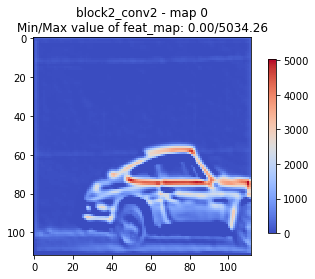

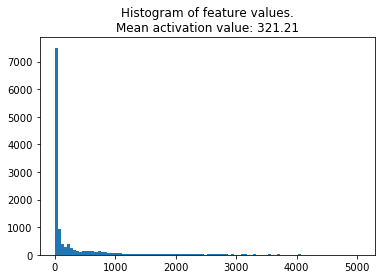

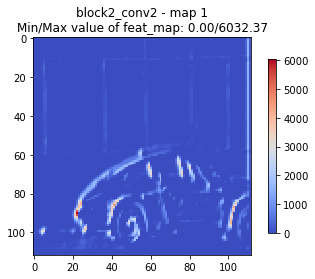

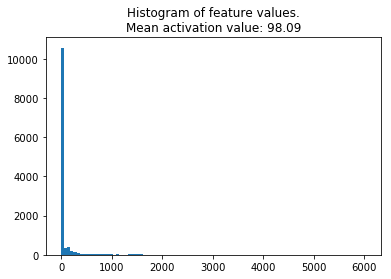

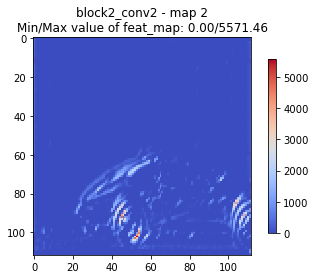

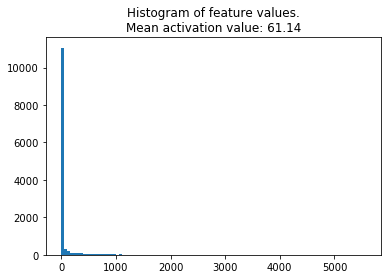

Output tensor for layer block3_conv1:
	In this layer output tensor has shape (1, 56, 56, 256)
	So there are 256 feature maps
	First 3 feature maps:


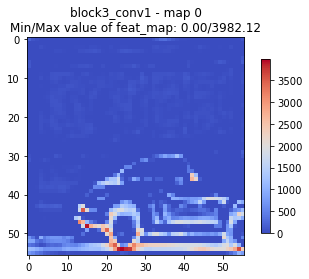

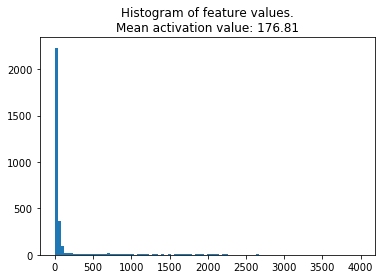

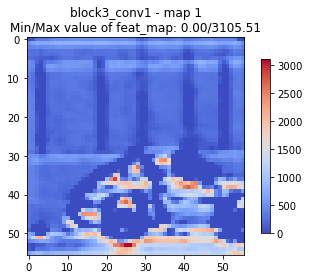

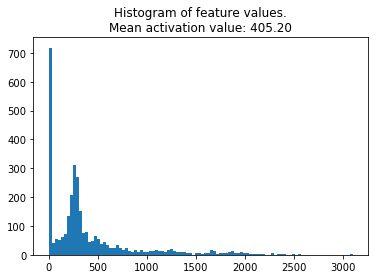

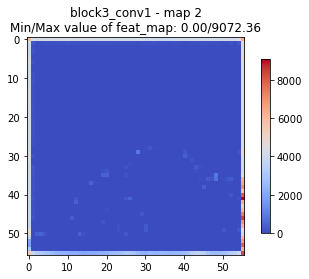

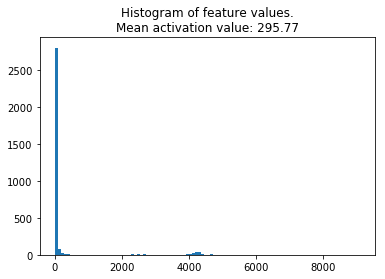

Output tensor for layer block3_conv2:
	In this layer output tensor has shape (1, 56, 56, 256)
	So there are 256 feature maps
	First 3 feature maps:


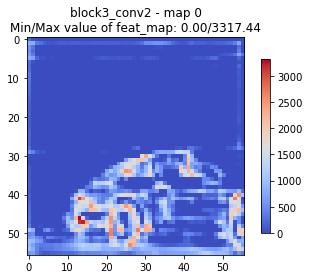

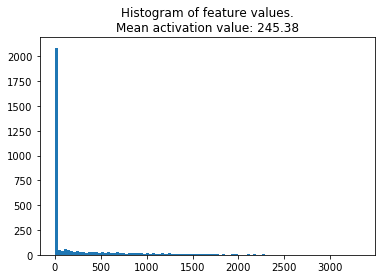

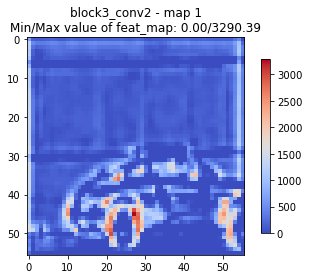

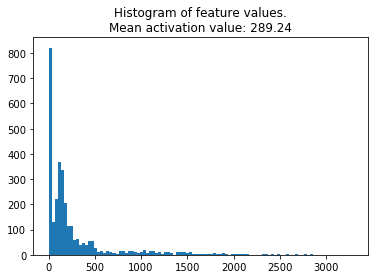

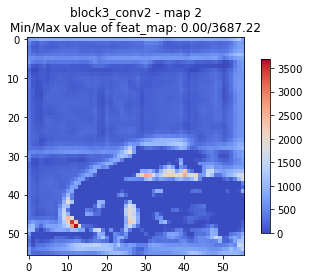

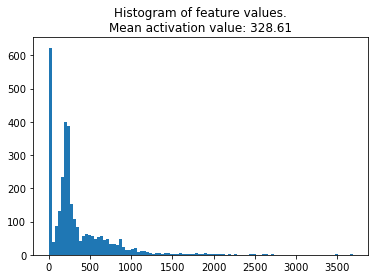

Output tensor for layer block3_conv3:
	In this layer output tensor has shape (1, 56, 56, 256)
	So there are 256 feature maps
	First 3 feature maps:


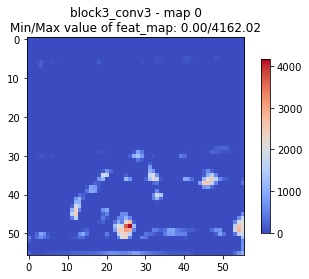

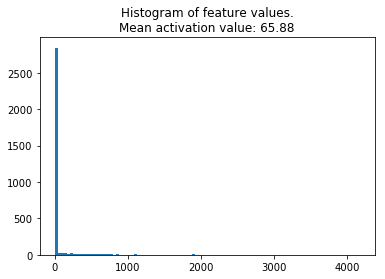

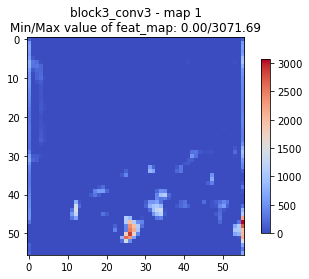

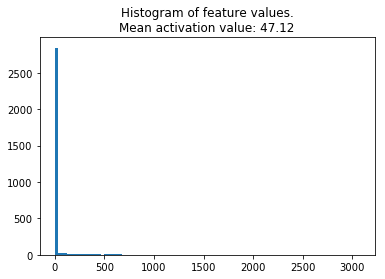

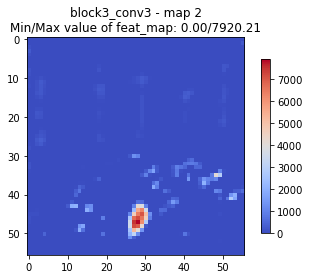

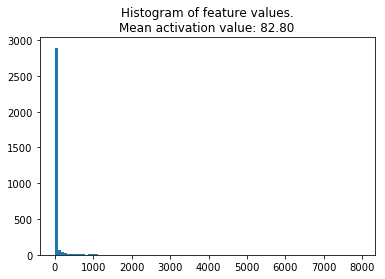

Output tensor for layer block4_conv1:
	In this layer output tensor has shape (1, 28, 28, 512)
	So there are 512 feature maps
	First 3 feature maps:


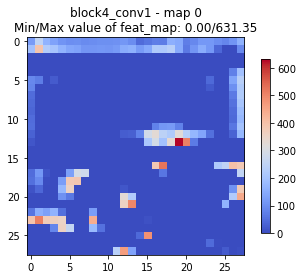

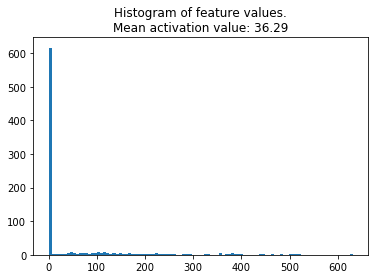

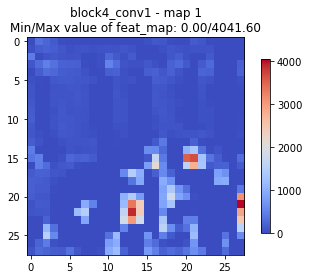

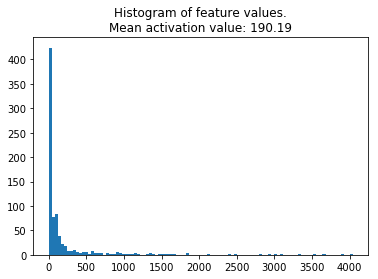

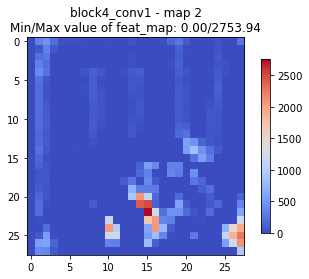

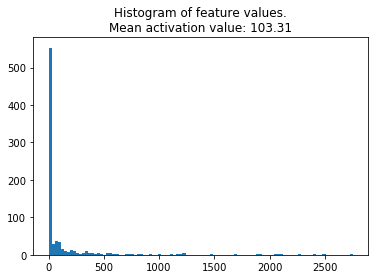

Output tensor for layer block4_conv2:
	In this layer output tensor has shape (1, 28, 28, 512)
	So there are 512 feature maps
	First 3 feature maps:


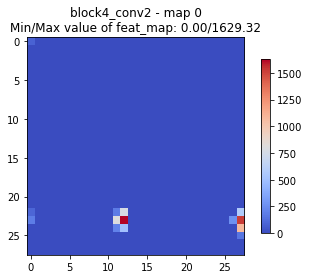

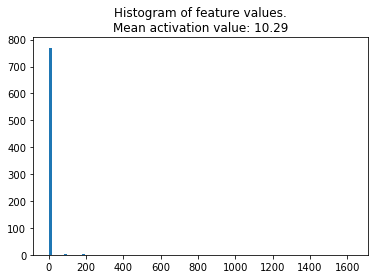

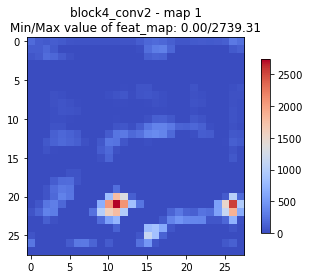

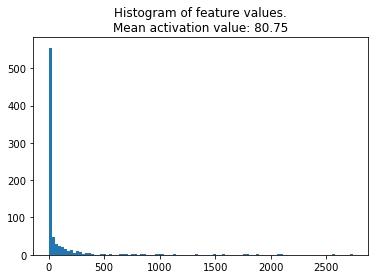

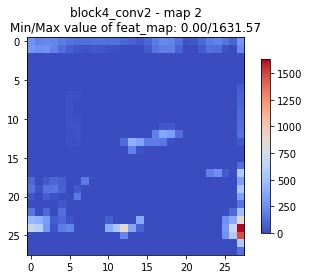

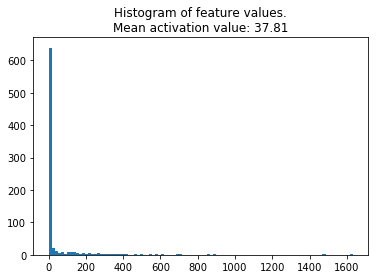

Output tensor for layer block4_conv3:
	In this layer output tensor has shape (1, 28, 28, 512)
	So there are 512 feature maps
	First 3 feature maps:


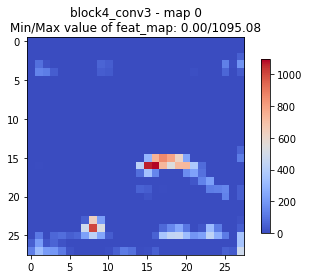

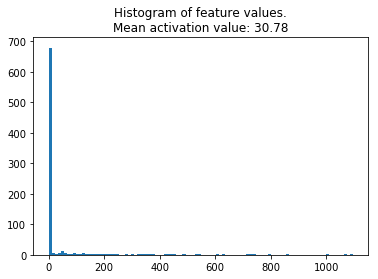

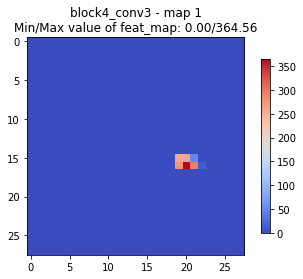

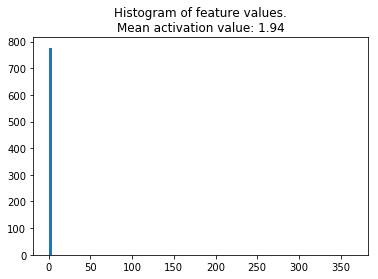

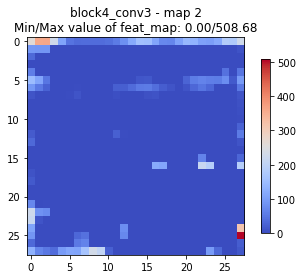

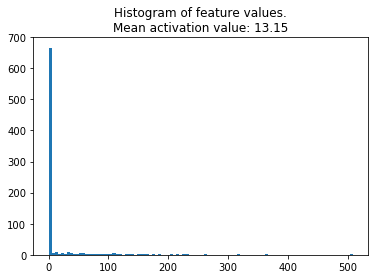

Output tensor for layer block5_conv1:
	In this layer output tensor has shape (1, 14, 14, 512)
	So there are 512 feature maps
	First 3 feature maps:


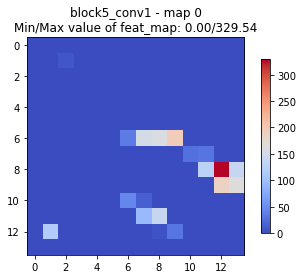

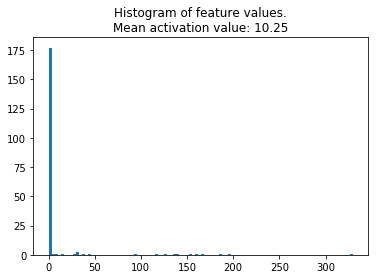

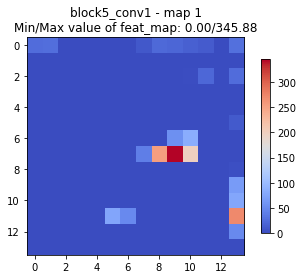

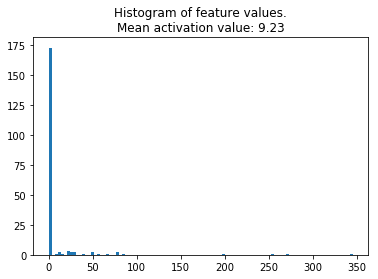

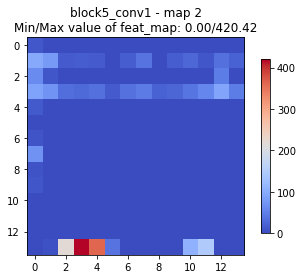

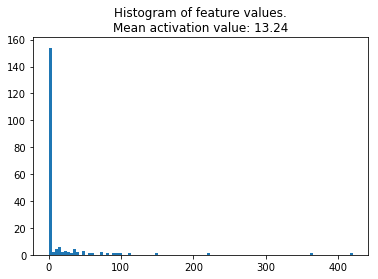

Output tensor for layer block5_conv2:
	In this layer output tensor has shape (1, 14, 14, 512)
	So there are 512 feature maps
	First 3 feature maps:


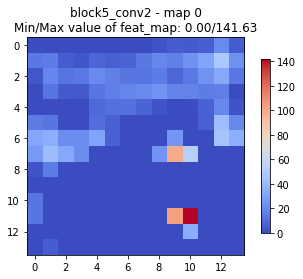

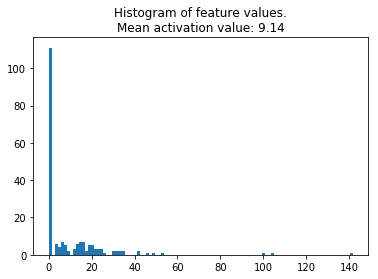

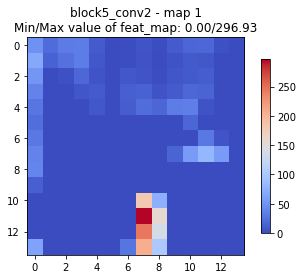

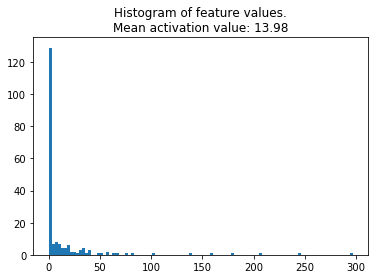

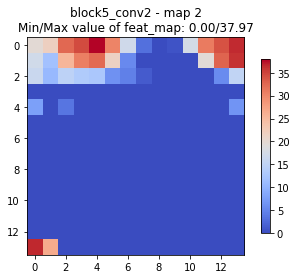

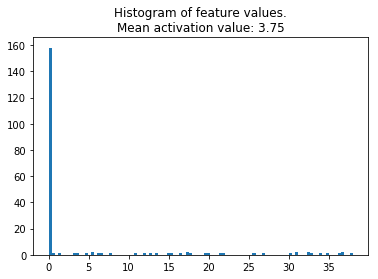

Output tensor for layer block5_conv3:
	In this layer output tensor has shape (1, 14, 14, 512)
	So there are 512 feature maps
	First 3 feature maps:


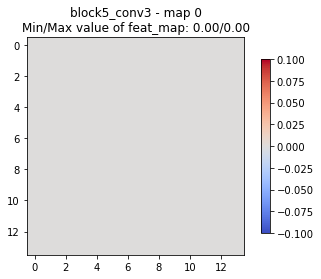

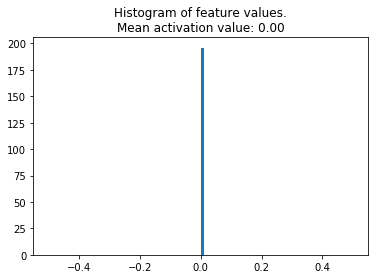

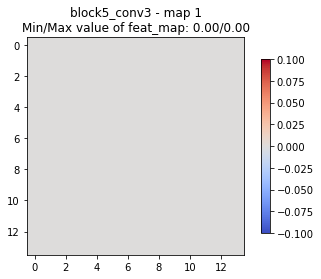

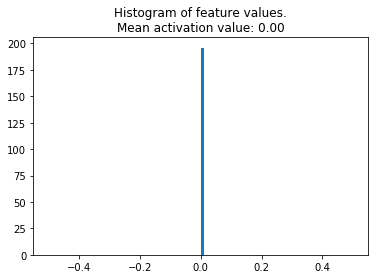

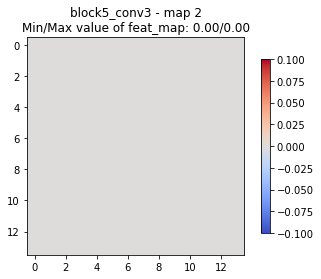

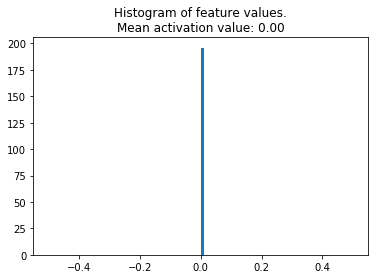

In [11]:
plot_all_feature_maps( input_img_tensor_4D )

# Determining the receptive field size of a neuron

The idea here is the following:

We first stimulate the CNN with an "empty" (i.e., black) image. Then we consider one neuron in each feature map and record its activtiy (i.e., output value). We store the activity for each neuron in a list.

Then we let a single pixel stimulus run over the image, consider the same neurons again and ask the question: Did its value change? Or in other words: does it respond to input from that pixel. If yes, we add the pixel position to a list of pixel positions, that the neuron responds to.

Finally, we visualize the list of pixel positions each neuron responds to as an image. This is a helpful visualization! It shows us from which part of the region the neuron receives its input, or in other words: it shows the receptive field of the neuron.

So let us first record the neuronal activity for an empty image:

In [69]:
def determine_neurons_coords():
    
    print("determine_neurons_coords STARTED")
    
    # 1. generate a test image    
    input4D = np.zeros( (1, IMG_SIZE[0], IMG_SIZE[1], 3) )
        
    # 2. feedforward step with that empty image
    output_tensors = activation_model.predict( input4D )
    
    # 3. get list of output tensors
    nr_output_tensors = len(output_tensors)
    
    # 4. prepare lists to store neuron coords
    neuron_coords_per_conv_layer = []

    # 5. for each output tensor ...    
    for out_tensor_nr, out_tensor in enumerate(output_tensors):
        
        # 5.1 get the first feature map
        feat_map = out_tensor[0, :, :, 0 ]
        
        # 5.2 get spatial dimensions of that feature map        
        dimy = feat_map.shape[0]
        dimx = feat_map.shape[1]
        
        # 5.3 just take neuron in "middle"
        neurx = int(dimx/2)
        neury = int(dimy/2)

        # 5.4 add neuron coords to list of coords
        neuron_coords_per_conv_layer.append( (neurx,neury) )

        print("\tFor out tensor nr {} we take neuron ({},{},{})".
               format(out_tensor_nr, 0, neurx, neury))
        
    # end for out_tensor
        
    print("determine_neurons_coords FINISHED\n")
        
    # 4. return the list of neuron coords
    return neuron_coords_per_conv_layer




def determine_normal_activations(global_value,
                                 neuron_coords_per_conv_layer):
    
    # 1. generate an image where we have the
    #    same value global_value for each pixel    
    input4D = np.zeros( (1, IMG_SIZE[0], IMG_SIZE[1], 3) )
    input4D[0,:,:,:] = global_value
    
    # 2. feedforward step with that empty image
    output_tensors = activation_model.predict( input4D )
    
    # 3. get list of output tensors
    nr_output_tensors = len(output_tensors)
    
    # 4. prepare lists to store neuron activities    
    neuron_acts_per_conv_layer = []

    # 5. for each output tensor ...    
    for out_tensor_nr, out_tensor in enumerate(output_tensors):
        
        # 5.1 get the first feature map
        feat_map = out_tensor[0, :, :, 0 ]
        
        # 5.2 get spatial dimensions of that feature map        
        dimy = feat_map.shape[0]
        dimx = feat_map.shape[1]

        # 5.3 get neuron coords from list of coords
        neuron_coords = neuron_coords_per_conv_layer[out_tensor_nr]
        
        # 5.4 get the activation value of that neuron
        act_value = feat_map[neuron_coords[1], neuron_coords[0]]
        
        # 5.5 add activation to list of activations
        neuron_acts_per_conv_layer.append( act_value )
                    
        # end for y
    # end for out_tensor
        
        
    # 6. return the list of base neuron activations
    #    when "stimulated" with an empty image
    return neuron_acts_per_conv_layer


neuron_coords = determine_neurons_coords()
print("Here are all {} neuron coords:\n {}"
      .format(len(neuron_coords), neuron_coords) )

acts = determine_normal_activations(1, neuron_coords)
print("Here are all {} neuron activities:\n {}"
      .format(len(acts), acts) )

acts = determine_normal_activations(0, neuron_coords)
print("Here are all {} neuron activities:\n {}"
      .format(len(acts), acts) )




determine_neurons_coords STARTED
	For out tensor nr 0 we take neuron (0,112,112)
	For out tensor nr 1 we take neuron (0,112,112)
	For out tensor nr 2 we take neuron (0,56,56)
	For out tensor nr 3 we take neuron (0,56,56)
	For out tensor nr 4 we take neuron (0,28,28)
	For out tensor nr 5 we take neuron (0,28,28)
	For out tensor nr 6 we take neuron (0,28,28)
	For out tensor nr 7 we take neuron (0,14,14)
	For out tensor nr 8 we take neuron (0,14,14)
	For out tensor nr 9 we take neuron (0,14,14)
	For out tensor nr 10 we take neuron (0,7,7)
	For out tensor nr 11 we take neuron (0,7,7)
	For out tensor nr 12 we take neuron (0,7,7)
determine_neurons_coords FINISHED

Here are all 13 neuron coords:
 [(112, 112), (112, 112), (56, 56), (56, 56), (28, 28), (28, 28), (28, 28), (14, 14), (14, 14), (14, 14), (7, 7), (7, 7), (7, 7)]
Here are all 13 neuron activities:
 [0.7459887, 2.6898572, 0.0, 4.4273643, 0.0, 0.0, 0.0, 3.0689042, 0.0, 0.0, 0.0, 0.47690904, 0.0]
Here are all 13 neuron activities:
 [0.

Here comes the stimulation of the CNN with images that only contain a single pixel set to a value different from 0.0:

In [74]:
def determine_relevant_pixels(coords, base_acts):

    some_value_different_from_zero = 1.0

    # we will record a list of pixel positions
    # for each neuron
    # where the activation value of the neuron
    # has changed
    pixels_per_neuron = {}
    for neuron_nr in range(0, len(acts)):
        pixels_per_neuron[neuron_nr] = []

    step_size = 2
    for y in range(0, IMG_SIZE[0], step_size):
        print("Analyzing image row", y)
        for x in range(0, IMG_SIZE[1], step_size):
            
            input4D = np.zeros( (1, IMG_SIZE[0], IMG_SIZE[1], 3) )

            # set some input
            input4D[0, y, x, :] = some_value_different_from_zero

            # feedforward step
            output_tensors = activation_model.predict( input4D )

            # now check for each selected neuron in each of the conv
            # layer whether its value has changed

            # 5. for each output tensor ...   
            for neuron_nr, out_tensor in enumerate(output_tensors):

                # 5.1 get the first feature map
                feat_map = out_tensor[0, :, :, 0 ]

                # 5.2 get spatial dimensions of that feature map        
                dimy = feat_map.shape[0]
                dimx = feat_map.shape[1]

                # 5.3 get neuron coords from list of coords
                neuron_coords = coords[neuron_nr]

                # 5.4 get the current activation value of that neuron
                act_value = feat_map[neuron_coords[1], neuron_coords[0]]
                act_value_base = base_acts[neuron_nr]

                # 5.5 did the activation value changed
                if act_value != act_value_base:
                    pixels_per_neuron[neuron_nr].append( (x,y))

                # end for y
            # end for out_tensor
            
    return pixels_per_neuron
        
pixels_per_neuron = determine_relevant_pixels(neuron_coords, acts)

for neuron_nr in range(0, len(acts)):
    
    pixel_list = pixels_per_neuron[neuron_nr]
            
    print("\nNeuron {}: found {} relevant pixels"
          .format(neuron_nr, len(pixel_list)))
    print(pixel_list)

Analyzing image row 0
Analyzing image row 2
Analyzing image row 4
Analyzing image row 6
Analyzing image row 8
Analyzing image row 10
Analyzing image row 12
Analyzing image row 14
Analyzing image row 16
Analyzing image row 18
Analyzing image row 20
Analyzing image row 22
Analyzing image row 24
Analyzing image row 26
Analyzing image row 28
Analyzing image row 30
Analyzing image row 32
Analyzing image row 34
Analyzing image row 36
Analyzing image row 38
Analyzing image row 40
Analyzing image row 42
Analyzing image row 44
Analyzing image row 46
Analyzing image row 48
Analyzing image row 50
Analyzing image row 52
Analyzing image row 54
Analyzing image row 56
Analyzing image row 58
Analyzing image row 60
Analyzing image row 62
Analyzing image row 64
Analyzing image row 66
Analyzing image row 68
Analyzing image row 70
Analyzing image row 72
Analyzing image row 74
Analyzing image row 76
Analyzing image row 78
Analyzing image row 80
Analyzing image row 82
Analyzing image row 84
Analyzing image 

Now we can visualize the relevant input pixels (receptive field) for each neuron:


Neuron 0: found 1 relevant pixels


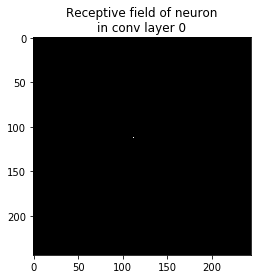


Neuron 1: found 9 relevant pixels


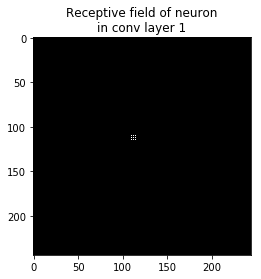


Neuron 2: found 0 relevant pixels


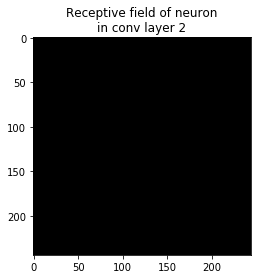


Neuron 3: found 49 relevant pixels


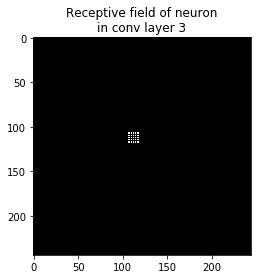


Neuron 4: found 0 relevant pixels


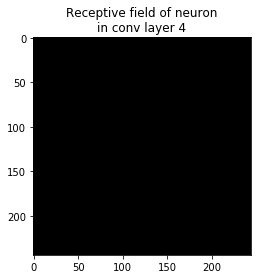


Neuron 5: found 26 relevant pixels


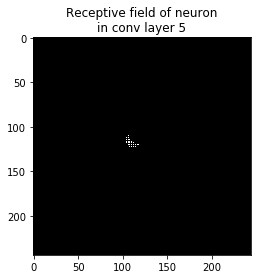


Neuron 6: found 0 relevant pixels


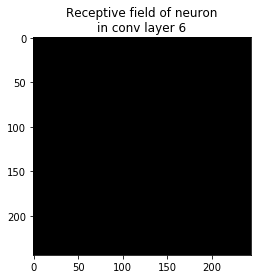


Neuron 7: found 900 relevant pixels


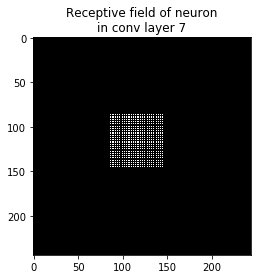


Neuron 8: found 0 relevant pixels


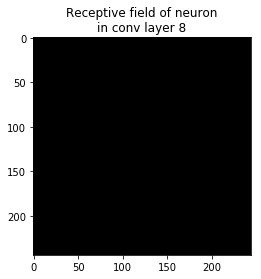


Neuron 9: found 0 relevant pixels


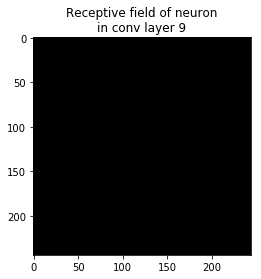


Neuron 10: found 0 relevant pixels


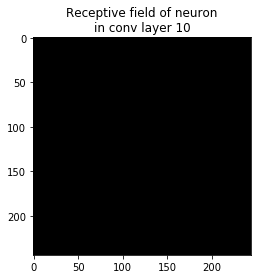


Neuron 11: found 6715 relevant pixels


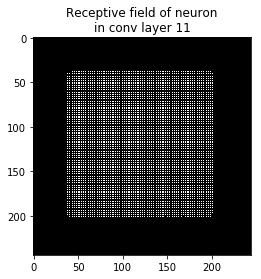


Neuron 12: found 7 relevant pixels


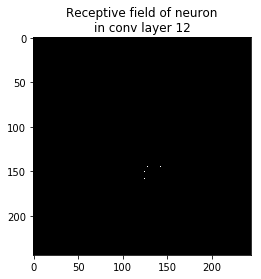

In [75]:
for neuron_nr in range(0, len(acts)):
    
    visu = np.zeros((244,244,3))
    
    pixel_list = pixels_per_neuron[neuron_nr]
            
    print("\nNeuron {}: found {} relevant pixels"
          .format(neuron_nr, len(pixel_list)))
        
    for pixel in pixel_list:
        
        visu[pixel[1], pixel[0],0] = 1.0
        visu[pixel[1], pixel[0],1] = 1.0
        visu[pixel[1], pixel[0],2] = 1.0
    
    plt.imshow(visu)
    plt.title("Receptive field of neuron\n"
              "in conv layer {}".format(neuron_nr) )
    plt.show()